In [ ]:
 # Notebook AI NLP 
contents:
    - NLP section
    - Pathfinding 
    - Voice to NLP

In [3]:
!ls ../3.dataset/dataset_train


agency.txt	    calendar.txt  stops.txt	  transfers.txt
calendar_dates.txt  routes.txt	  stop_times.txt  trips.txt


In [ ]:
# section NLP

In [12]:
# imports libs
import numpy as np
import pandas as pd
#import numba
#from sympy import isprime, primerange
from math import sqrt
#from sklearn.neighbors import KDTree
#from tqdm import tqdm
from itertools import combinations
import pandas as pd
import plotly.graph_objects as go
import networkx as nx

import matplotlib.pyplot as plt

import re
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv


In [ ]:
# section pathfinding
#import stops.txt to build dataset
# lib python 

In [ ]:
### FORMAT DATASET INTO SQL ###
### IMPORT ###
!pip install pysqlite3 
import sqlite3

import pandas as pd

### ENV ###
# test import original sncf dataset through api
!pip install python-dotenv
import dotenv
%load_ext dotenv
%dotenv
#var SNCF_API
#uri="http://api.sncf.com/v1"
#testing api https://canaltp.github.io/navitia-playground/

### DB PROVISIONING ###
db = sqlite3.connect('station_network.db')
db.execute("Drop table gare;")
db.execute("Drop table associe;")
db.commit()

### CREATE DATASET ###
#parse gare data
with open("ddl.sql",'r') as readed:
    db.executescript(readed.read())
    db.commit()
with open("../3.dataset/dataset_test/timetables.csv",'r') as readed:
    for line in readed.readlines()[1:]:
        split = line.split("\t")
        print(split)
        gares = split[1].split(" - ")
        try:
            db.execute(f"Insert into gare(nom_gare) values (\"{gares[0]}\");")
            #print(f"Insert into gare(nom_gare) values (\"{gares[0]}\");")
        except:
            print(f"La gare {gares[0]} existe déja")
        try:
            db.execute(f"Insert into gare(nom_gare) values (\"{gares[1]}\");")
        except:
            print(f"La gare {gares[1]} existe déja")
        try:
            db.execute(f"Insert into associe(id_gare,id_gare1) values ( \
            (select id_gare from gare where nom_gare=\"{gares[0]}\"), \
            (select id_gare from gare where nom_gare=\"{gares[1]}\"));")
        except:
            print(f"L'assotiation {gares[0]}/{gares[1]} existe déja")


In [15]:
### FORMAT DATASET INTO GRAPH FRIENDLY DATAFRAME ###
### IMPORT ###
import pandas as pd
import plotly.graph_objects as go
import networkx as nx

import matplotlib.pyplot as plt

import re
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

### CREATE DATASET ###
#parse gare data

G2= nx.Graph()
with open("../3.dataset/dataset_test/timetables.csv",'r') as readed:
    for line in readed.readlines()[1:]:
        split = line.split("\t")
        #print(split)
        gares = split[1].split(" - ")
        #print(gares)
        dist = re.findall(r'\d+', split[2])
        num_dist = int(dist[0])
        #print(num_dist)
        
        #
        #
        #
        
        try:
            # NODE 0
            G2.add_node(gares[0])
            #    db.execute(f"Insert into gare(nom_gare) values (\"{gares[0]}\");")
            #print(f"Insert into gare(nom_gare1) values (\"{gares[0]}\");")
        except:
            # NODE ALREADY EXISTS
            print(f"La gare {gares[0]} existe déja")
        try:
            # NODE 1
            G2.add_node(gares[1])
            #print(f"Insert into gare(nom_gare2) values (\"{gares[1]}\");")
            #    db.execute(f"Insert into gare(nom_gare) values (\"{gares[1]}\");")
        except:
            print(f"La gare {gares[1]} existe déja")
        try:
            # EDGE 0 TO 1
            G2.add_edge(gares[0], gares[1], length=num_dist)
            #    db.execute(f"Insert into associe(id_gare,id_gare1) values ( \
            #    (select id_gare from gare where nom_gare=\"{gares[0]}\"), \
            #    (select id_gare from gare where nom_gare=\"{gares[1]}\"));")
        except:
            # EDGE EXISTING ALREADY
            print(f"L'assotiation {gares[0]}/{gares[1]} existe déja")

#v1            
#nx.draw(G2, with_labels=True)

#v2
#pos = nx.spring_layout(G2, weight='length')
#nx.draw(G2, pos)
#nx.draw_networkx_edge_labels(G2, pos)
#plt.draw()
#plt.show

R = to_agraph(G2)
#print(R)
R.layout('dot')
#R.draw('rail1.png')

In [19]:
### SAMPLE GRAPH ###
#!ls
#!chmod u+x ../sql_graphviz/sql_graphviz.py

### IMPORTS ###
import plotly.graph_objects as go
import networkx as nx

import matplotlib.pyplot as plt

### GRAPH ###
# A random graph with 200 nodes and 0.125 minimum distance between nodes
G = nx.random_geometric_graph(200, 0.125)
 
### GRAPH PLOTING ###


#
# Create Edges
# Add edges as disconnected lines in a single trace and nodes as a scatter trace
#


edge_x = []
edge_y = []
print(G2)
list(H.edges())
for edge in G2.edges():
    #print(G2.nodes[edge[0]][0]['pos'])
    x0, y0 = G2.nodes[edge[0]]['pos']
    x1, y1 = G2.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G2.nodes():
    x, y = G2.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


#
#Color Node Points
#Color node points by the number of connections.
#


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


#
# Create Network Graph
#
#


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

nx.draw(G2, with_labels=True)
plt.draw()
plt.show

Graph with 818 nodes and 1572 edges


KeyError: 'pos'

In [35]:
import networkx as nx
#import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

G0 = nx.DiGraph()
G0.add_node("A",rank=0)
G0.add_nodes_from(['B','C','D'],style='filled',fillcolor='red')
G0.add_nodes_from(['D','F','G'])
G0.add_nodes_from(['H'],label='target')
G0.add_edge('A','B',arrowsize=2.0)
G0.add_edge('A','C',penwidth=2.0)
G0.add_edge('A','D')
G0.add_edges_from([('B','E'),('B','F')],color='blue')
G0.add_edges_from([('C','E'),('C','G')])
G0.add_edges_from([('D','F'),('D','G')])
G0.add_edges_from([('E','H'),('F','H'),('G','H')])

# set defaults
G0.graph['graph']={'rankdir':'TD'}
G0.graph['node']={'shape':'circle'}
G0.graph['edges']={'arrowsize':'4.0'}

A = to_agraph(G0)
print(A)
A.layout('dot')
A.draw('abcd.png')

strict digraph "" {
	graph [edges="{'arrowsize': '4.0'}",
		rankdir=TD
	];
	node [label="\N",
		shape=circle
	];
	A	[rank=0];
	B	[fillcolor=red,
		style=filled];
	A -> B	[arrowsize=2.0];
	C	[fillcolor=red,
		style=filled];
	A -> C	[penwidth=2.0];
	D	[fillcolor=red,
		style=filled];
	A -> D;
	B -> F	[color=blue];
	B -> E	[color=blue];
	C -> G;
	C -> E;
	D -> F;
	D -> G;
	H	[label=target];
	F -> H;
	G -> H;
	E -> H;
}



[1, 2, 3, 'm', 'spam', 's', 'p', 'a']
[(1, 2), (1, 3), (1, 'm')]


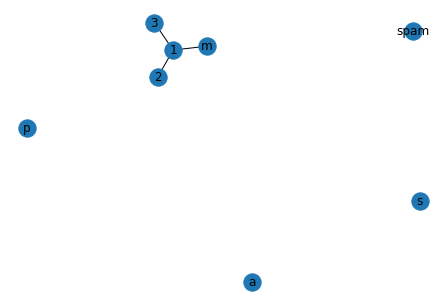

In [5]:
### GRAPH PLAYGROUND ###
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx

### CUSTOM GRAPH  ###
#G = nx.random_geometric_graph(200, 0.125)
G1= nx.Graph()
G1.add_edges_from([(1,2),(1,3)])
G1.add_node(1)
G1.add_edge(1,2)
G1.add_edge(1,'m')
G1.add_node("spam")       # adds node "spam"
G1.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

print(G1.nodes())

print(G1.edges())

nx.draw(G1, with_labels=True)
plt.draw()
plt.show()

In [3]:
### GRAPH PLAYGROUND ###
import plotly.graph_objects as go
import networkx as nx

### CUSTOM GRAPH  ###
#G = nx.random_geometric_graph(200, 0.125)
G1= nx . Graph ()
G1.add_edges_from([(1,2),(1,3)])
G1.add_node(1)


In [20]:
### GRAPH GENERATOR ###
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text



fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

KeyError: 'pos'

In [3]:
### DATAVIZ ###
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

import graphviz
import pyparsing
#exemple_query = 
#"digraph Venues {" + (
#  Invoke-Sqlcmd -Query "SELECT * FROM HierarchyTest.dbo.NodeLabels" | 
#  ForEach-Object {"N" + $_.Node + "[label = """ + $_.Label + """];"}
#) + (
#  Invoke-Sqlcmd -Query "SELECT * FROM HierarchyTest.dbo.Edges" |
#""  ForEach-Object {"N" + $_.Parent + " -> N" + $_.Child + ";"}
#) +
#"}" | circo -Tpng -o venues.png

SyntaxError: invalid syntax (3183415.py, line 4)

In [17]:
!../sql_graphviz/sql_graphviz.py station_network.db > graph.dot
dot -Tsvg graph.dot > graph.svg

SyntaxError: invalid syntax (2050918187.py, line 2)

In [6]:
# voice to nlp
# 
!ls ..

0.subject	2.documentation  4.notebook	     README.md
1.devops-tools	3.dataset	 docker-compose.yml  sql_graphviz


In [24]:
import dash_cytoscape as cyto



def cytograph(G):
    '''
    func to build a fig of a network graph from an existing graph
    input G from nx
    output fig to show
    '''
    # init
    fig=0
    nodes = set()
    cy_edges = []
    cy_nodes = []

    # store
    
    
    #build
    
    #style - sounds optional, we like good ol' html
    stylesheet = [
        {
            "selector": 'node', #For all nodes
            'style': {
                "opacity": 0.9,
                "label": "data(label)", #Label of node to display
                "background-color": "#07ABA0", #node color
                "color": "#008B80" #node label color
            }
        },
        {
            "selector": 'edge', #For all edges
            "style": {
                "target-arrow-color": "#C5D3E2", #Arrow color
                "target-arrow-shape": "triangle", #Arrow shape
                "line-color": "#C5D3E2", #edge color
                'arrow-scale': 2, #Arrow size
                'curve-style': 'bezier' #Default curve-If it is style, the arrow will not be displayed, so specify it
        }
    }
    return fig
    
# call the func
fig = cytograph(G2)

''' DASH LAYOUT CODE

app.layout = html.Div([
    dcc.Dropdown(
            id='dropdown-layout',
            options=[
                {'label': 'random',
                 'value': 'random'},
                {'label': 'grid',
                 'value': 'grid'},
                {'label': 'circle',
                 'value': 'circle'},
                {'label': 'concentric',
                 'value': 'concentric'},
                {'label': 'breadthfirst',
                 'value': 'breadthfirst'},
                {'label': 'cose',
                 'value': 'cose'}
            ], value='grid'
        ),
    html.Div(children=[
        cyto.Cytoscape(
            id='cytoscape',
            elements=cy_edges + cy_nodes,
            style={
                'height': '95vh',
                'width': '100%'
            },
            stylesheet=stylesheet #Give the style you just defined
        )
    ])

])
'''

In [4]:
def dj_path(G):
    print(nx.dijkstra_path(G, 'Gare de Biel', 'Gare de Meroux'))
        



NameError: name 'df_path' is not defined

In [16]:
print(nx.dijkstra_path(G2, 'Gare de Biel', 'Gare de Meroux'))

['Gare de Biel', 'Gare de Meroux']
